# ASTR 5490 Homework 4 (Jimmy Lilly 11/26/20)

In [3]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from Blackbody import SED
from scipy.integrate import quad
from MathTools import EquilTemp, MagDiff
from MaxwellBoltzmann import MaxwellBoltzmann
from ReadFile import ReadBandpass
import bisect

# Reload scripts I may have changed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1) Create a blackbody spectral energy distribution for a star like the sun with $T_{eff}=5780 K$ and $1 R_{\odot}$. Include wavelengths between the X-ray (1 angs) and far infrared (100 $\mu m$) [$10^{-10}m$ to $ 10^{-4}m$]
## <center> $B_{\lambda}(T)=\frac{2hc^2}{\lambda^5}\frac{1}{\left(e^{\frac{hc}{\lambda kT}}-1\right)} \bigg\vert B_{\nu}(T) =\frac{2h\nu^3}{c^2}\frac{1}{\left(e^{\frac{h\nu}{kT}}-1\right)}$ </center>

## 1a) Plot this SED.  Integrate it over wavelength and multiply by the surface area of the sun ($4\pi R_{\odot}^2$) and another factor of $\pi$ (the angular integral over azimuthal and polar angle) and verify that you recover the luminosity of the sun: $4\pi R^2 \sigma T^4  = 2\cdot10^{33} \frac{erg}{s}$
## <center> $L_{\nu,\lambda}=4\pi^2R_{*}^2B_{\nu,\lambda}$ </center>
## 1b) What fraction of the energy is emitted shorter than the peak versus longer than the peak?

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Luminosity = 1.006 Lsun
24.91% of energy emitted below peak
75.03% of energy emitted above peak 

Program took 8.00 sec to run


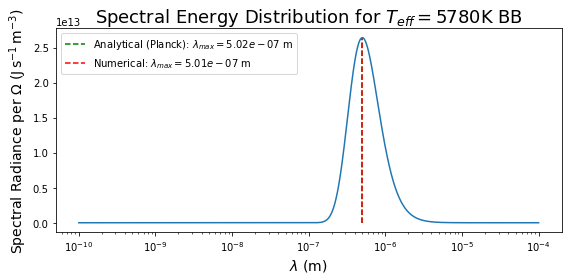

In [64]:
Sun_like = SED('wavelen','planck')
luminosity_1a = Sun_like.SEDStar(True)

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Lstar = 1.006 Lsun
Luminosity = 1.006 Lsun
31.41% of energy emitted below peak
65.88% of energy emitted above peak 

Program took 7.92 sec (0.132 min) to run


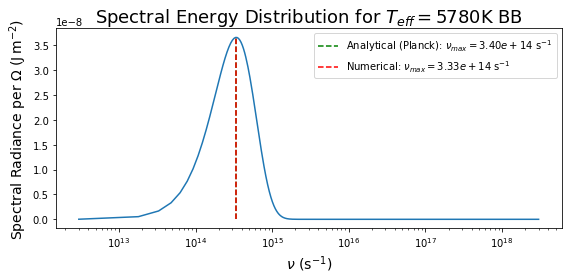

In [126]:
Sun_like_freq = SED('freq','planck',N=2*10**5)
luminosity_1a_2 = Sun_like_freq.SEDStar(True)

### The units on the y-axis of my frequency Planck function are correct, the s and Hz in the denominatior just cancel out in the calculation with astropy units. Also, my luminosity calculations are correct, the percentages just don't add to 100% because I'm not integrating over an infinite domain.

## 1c) Spectral energy distributions in astronomy are often plotted as $\nu L_{\nu}$ on the y-axis versus $\nu$ on the x axis because the total energy scales as $\nu$ (i.e., $E=h\nu$). Make such an SED and compare it to $L_{\nu}$ on the y-axis versus $\nu$. What changes?

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 8.08 sec to run


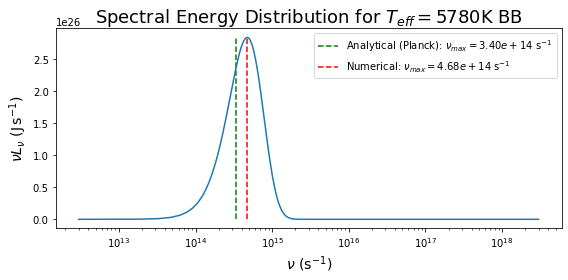

In [66]:
# Plot nu*L_nu vs. nu
plot_a_1c = SED('freq','xvar_luminos')
xdata_a,ydata_a = plot_a_1c.SEDStar(True)

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 7.91 sec to run


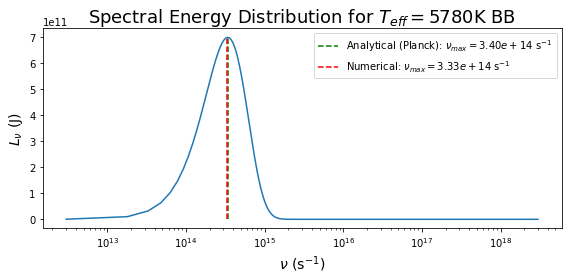

In [67]:
# Plot L_nu vs. nu
plot_b_1c = SED('freq','luminosity')
xdata_b,ydata_b = plot_b_1c.SEDStar(True)

### The plot of $\nu L_{\nu}$ is narrower arround the peak frequency than the $L_{\nu}$ plot. Also, the $\nu L_{\nu}$ plot peaks further from the peak Planck frequency than the plot of just $L_{\nu}$ does.

## 1d) Create an SED that consists of two components: a sun-like blackbody and a hot super-Jupiter with radius $R=3R_{Jup}$ at 0.05 au from the star. Plot each component separately.  Plot the contrast ratio, the ratio of $L_{\lambda}$ (or $L_{\nu}$) versus wavelength (or frequency)  to illustrate where this contrast ratio peaks.

Body Temperature = 1048.14 K


/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 7.91 sec to run


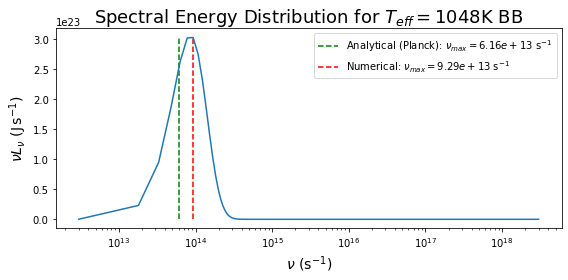

In [68]:
# Calculate temperature of hot super-Jupiter (HSJ)
T_HSJ = EquilTemp(0.5,1.0*const.R_sun,0.05*u.au,5780)
HSJ_SED = SED('freq','xvar_luminos',Teff=T_HSJ)
x_HSJ, y_HSJ = HSJ_SED.SEDStar(True)

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


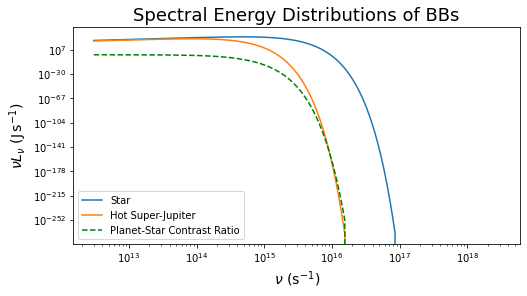

In [69]:
# Plotting SED components separately
plt.figure(figsize=(8,4))
plt.plot(xdata_a,ydata_a,label='Star') # plot SED of Sun-like star
plt.plot(x_HSJ,y_HSJ,label='Hot Super-Jupiter') # plot SED of hot super-Jupiter
contrast_ratio = np.divide(y_HSJ,ydata_a)
plt.plot(x_HSJ,contrast_ratio,label='Planet-Star Contrast Ratio',linestyle='dashed',color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\nu$ ({0:latex_inline})'.format(x_HSJ.unit),fontsize=14)
plt.ylabel(r'$\nu L_{{\nu}}$ ({0:latex_inline})'.format(y_HSJ.unit),fontsize=14)
plt.title('Spectral Energy Distributions of BBs',fontsize=18)
plt.legend()

### The contrast ratio peaks at shorter wavelengths near the far-infrared. This agrees with our previous discussions in this class about direct imaging needing to be done in the infrared as this is where the planet is most visible in front of the star.

## 1e) Fold (that is, multiply the $F_\nu$ by the efficiency at each wavelength and integrate over the bandpass) the SED of the sun (working in frequency units) through each bandpass (Kepler broad optical band and the 4.5 micron Spitzer band) to add up the energy that would be observed in each bandpass. 
## Compare the magnitude difference to the approximate V-W2 color from Pecaut & Mamajek (2013, ApJS, 208, 9) ($\Delta m=1.584$ according to their table) for a solar type star
## <center> $\Delta m=-2.5log\left(\frac{F(Kp)}{F(4.5)}\right)$ </center>
## Do the same for the super-Jupiter to find how many magnitudes of difference there are between the host star and planet at each wavelength.

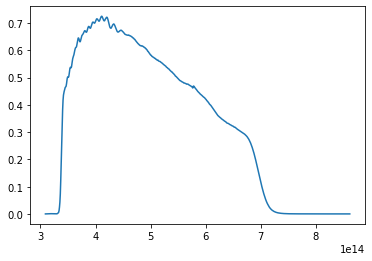

In [128]:
# Extract frequencies and efficiences from Kepler bandpass data
Kepler_freq, Kepler_effic = ReadBandpass('Bandpass_Kepler.dat','freq','nm')
Kepler_freq = Kepler_freq[::-1] # List elements in ascending frequency

# Calculate flux over Kepler bandpass for Sun-like star
Kepler_flux_Sun = Sun_like_freq.ResponseFunction(Kepler_freq,Kepler_effic,plot=True)

# Calculate flux over Kepler bandpass for A0V star (Teff=9700K)
SED_A0 = SED('freq','planck',Teff=9700)
Kepler_flux_A0 = SED_A0.ResponseFunction(Kepler_freq,Kepler_effic)

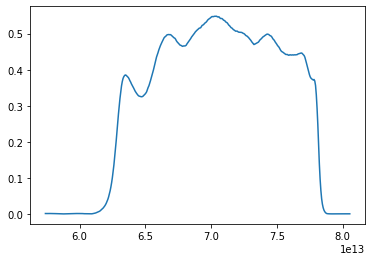

In [133]:
# Extract frequencies and efficiences from Spitzer 4.5um bandpass data
Spitzer_freq, Spitzer_effic = ReadBandpass('Bandpass_SpitzerI2_4.5microns.dat','freq','um')
Spitzer_freq = Spitzer_freq[::-1] # List elements in ascending frequency

# Calculate flux over Spitzer bandpass for Sun-like star
Spitzer_flux_Sun = Sun_like_freq.ResponseFunction(Spitzer_freq,Spitzer_effic,plot=True)

# Calculate flux over Spitzer bandpass for Sun-like star
Spitzer_flux_A0 = SED_A0.ResponseFunction(Spitzer_freq,Spitzer_effic)

In [140]:
# Calculate magnitude difference considering both a G2V (Sun-like) star and an A0V star
delta_m_Sun = MagDiff(Kepler_flux_Sun,Spitzer_flux_Sun)
delta_m_A0 = MagDiff(Kepler_flux_A0,Spitzer_flux_A0)
delta_m = delta_m_Sun-delta_m_A0
print("My calculated V-W2 color for a Sun-like star is {0:.3f}".format(delta_m))

Apparent magnitude difference = -5.176
Apparent magnitude difference = -6.335
My calculated V-W2 color for a Sun-like star is 1.159


### My result for a Sun-like star is relatively close to the 1.584 from the table, but not quite. I think this can be attributed to using different reference stars to define the magnitude scale

In [148]:
# To do this for Jupiter, need to calculate temperature of Jupiter using radiative equilibrium
T_Jup_Sun = EquilTemp(5.2*u.au,0.34)
T_Jup_A0 = EquilTemp(5.2*u.au,0.34,Rstar=2.09*const.R_sun,Teff=9700*u.K)

# Create instance of SED class for Jupiter
SED_Jup = SED('freq','planck',Teff=T_Jup_Sun.value)
SED_Jup_A0 = SED('freq','planck',Teff=T_Jup_A0.value)

# Calculate fluxes over bandpasses for Sun-like star
Kepler_flux_Jup = SED_Jup.ResponseFunction(Kepler_freq,Kepler_effic)
Spitzer_flux_Jup = SED_Jup.ResponseFunction(Spitzer_freq,Spitzer_effic)

# Calculate fluxes over bandpasses for A0V star
Kepler_flux_Jup_A0 = SED_Jup_A0.ResponseFunction(Kepler_freq,Kepler_effic)
Spitzer_flux_Jup_A0 = SED_Jup_A0.ResponseFunction(Spitzer_freq,Spitzer_effic)

# Calculate magnitude differences for Jupiter
delta_m_Jup_Sun = MagDiff(Kepler_flux_Jup,Spitzer_flux_Jup)
delta_m_Jup_A0 = MagDiff(Kepler_flux_Jup_A0,Spitzer_flux_Jup_A0)
delta_m_Jup = delta_m_Jup_Sun-delta_m_Jup_A0
print("My calculated V-W2 color for a super Jupiter is {0:.3f}".format(delta_m_Jup))

Apparent magnitude difference = 119.215
Apparent magnitude difference = 48.046
My calculated V-W2 color for a super Jupiter is 71.169


### There is almost 2 orders-of-magnitude difference between the star and super Jupiter's apparent magnitudes. Requires precise observations to detect the planet!

# 2) Maxwell-Boltzmann Distributions

## 2a) Plot a Maxwell-Boltzmann distribution of speeds for He in the Earth’s atmosphere.  Integrate this distribution between the $v_{esc}$ for Earth and $v=\infty$ to find what fraction of He atoms at any given time have speeds greater than escape velocity.  Do the same for molecular nitrogen and compare fractions

7.36e-50% of He atoms exceed escape velocity of Earth at T=250.0 K
Program took 0.09 sec to run


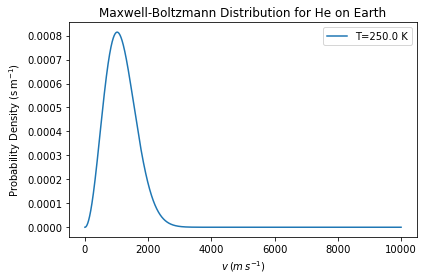

In [28]:
# Plot MB dist. for He at T=250K on Earth
He_dist = MaxwellBoltzmann(4,250.0,'He')
speeds, He_probs = He_dist.MBDistribution('Earth')

### $7.36\cdot10^{-50}\%$ of He atoms exceed escape velocity of Earth at T=250.0 K. This chance is much higher than for $N_2$ which makes sense since He is only a trace element in the atmosphere and is 7x less massive than $N_2$ so it can reach higher speeds more easily.

0.00e+00% of N2 atoms exceed escape velocity of Earth at T=250.0 K
Program took 0.07 sec to run


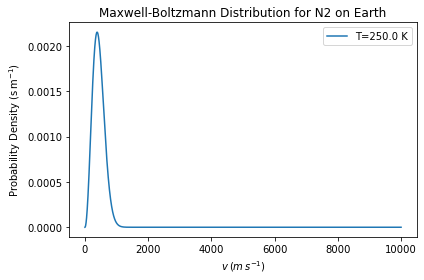

In [22]:
# Plot MB dist. for N at T=250K on Earth
N_dist = MaxwellBoltzmann(28,250.0,'N2')
speeds, N_probs = N_dist.MBDistribution('Earth')

### $0\%$ of $N_2$ atoms exceed escape velocity of Earth at T=250.0 K. This makes sense because most of the atmosphere is comprised of $N_2$ so we'd expect it's chance of escape at standard atmospheric temperatures to be extremely low

## 2b) Do the same thing for a hot $T=2000K$ Jupiter-sized planet, considering both atomic He and molecular CO.

1.73e-182% of He atoms exceed escape velocity of Jupiter at T=2000.0 K
Program took 0.11 sec to run


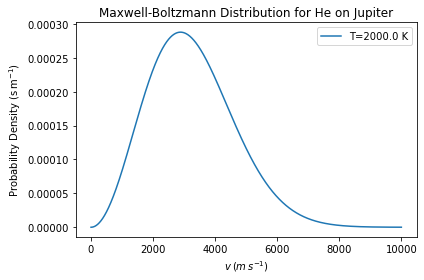

In [12]:
# Plot MB dist. for He at T=2000K on Jupiter
He_dist_Jup = MaxwellBoltzmann(4,2000.0,'He')
speeds, He_probs_Jup = He_dist_Jup.MBDistribution('Jupiter')

### $1.73\cdot10^{-182}\%\approx 0$ of He atoms exceed escape velocity of Jupiter at T=2000.0 K. Agrees with consensus that He is a major component of Jupiter's atmosphere

0.00e+00% of CO atoms exceed escape velocity of Jupiter at T=2000.0 K
Program took 0.08 sec to run


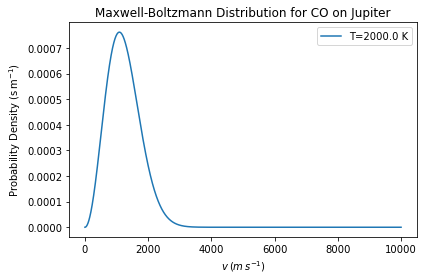

In [19]:
# Plot MB dist. for CO at T=2000K on Jupiter
CO_dist_Jup = MaxwellBoltzmann(28,2000.0,'CO')
speeds, CO_probs_Jup = CO_dist_Jup.MBDistribution('Jupiter')

### $0\%$ of CO atoms exceed escape velocity of Jupiter at T=2000.0 K. Presence of CO in Jupiter's atmosphere has been suggested to stem from meteoroid imacts that bring water which then gets converted to CO by various chemical processes (Prather, Logan, Mcelroy 2008 ApJ)
https://ui.adsabs.harvard.edu/abs/1978ApJ...223.1072P/abstract

# 3) Create a model of a protoplanetary debris disk system consisting of a central solar-type star and a disk of dust extending from the dust sublimation radius (where $T\sim2000 K$) to $1000 au$. Break the disk into thin rings of radius dr and compute the area of each ring ($2\pi rdr$) and the temperature of each ring under the assumption of radiative equilibrium
## <center> $r_{sub}=\frac{R_*}{2}\sqrt{1-A}\left(\frac{T_{eff}}{T_{eq}}\right)^{2}$</center>
## <center> $T_{ring}=\left(\frac{(1-A)R_{*}^2}{4r^2}\right)^{1/4}T_{eff}$ </center>

## 3a) Take $1 M_{\oplus}$ of dust and spread it uniformly over the model protoplanetary disk (use this to calculate surface density $\sigma_{disk}$ in $g/cm^2$).
## <center> $\sigma_{disk}=\frac{M_\oplus}{\pi R^2}=\frac{M_\oplus}{\pi (r_{max}-r_{sub})^2} \rightarrow [\sigma_{disk}]=\frac{g}{cm^2}$ </center>
## Take the mean mass of a spherical grain to be $M_{gr}=\frac{4\pi}{3} a^3 \rho_{gr}$ where the mean grain radius is $a=0.1 mm$ and the mean grain density is $\rho_{gr} = 2 g/cm^{3}$. The grain then radiates as a blackbody with that surface area ($4\pi a^2$). Given these grain parameters, compute a grain surface density ($\sigma_{grain}$) in number of grains per area in each ring...
## <center> $\eta_{grain} = \frac{\sigma_{disk}}{M_{gr}} \rightarrow [\eta_{grain}]=\frac{N_{grains}}{cm^2}$ </center>
## <center> $N_{grains/ring} = \eta_{grain}\cdot A_{ring}$ </center>
## and add up the flux from each grain within each ring
## <center> $L_{\nu,ring}=\sum\limits_{i=1}^{N_{grains/ring}} L_{\nu,i}=\sum\limits_{i=1}^{N_{grains/ring}} \pi(4\pi a^2)B_{\nu}(T_{ring})={N_{grains/ring}}\cdot4\pi^2 a^2\cdot B_{\nu}(T_{ring})$ </center>
## <center> $L_{\nu,disk}=\sum\limits_{i=1}^{N_{rings}}\left(L_{\nu,ring}\right)_{i}$ </center>
## Plot the SED of the star, the disk, and the sum of the two.   What is the ratio of luminosity in the disk to the luminosity in the star?  

In [ ]:
# Calculate disk-to-star luminosity ratio for 3a
SED_Disk_1000au_freq = SED('freq','xvar_luminos')
freq_ydata_3a = SED_Disk_1000au_freq.StarDiskProfile()

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


StarDiskProfile took 10.72 sec (0.179 min) to run


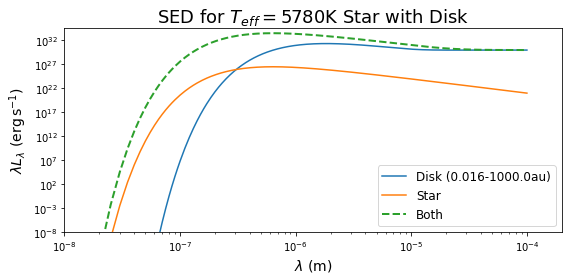

In [108]:
# Plot disk, star, and combined SED for #3a
SED_Disk_1000au_wavelen = SED('wavelen','xvar_luminos')
SED_Disk_1000au_wavelen.StarDiskProfile()

## 3b) Now suppose planets have cleared out all the dust inside 1 au or inside 10 au.  Generate and plot the resulting spectral energy distributions and ratios $L_{disk}/L{*}$.   Comment on how these spectral energy distributions might be used to infer the presence of gaps in the disk.

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Lstar = 1.003 Lsun
Disk-to-Star Luminosity Ratio = 5.59e-03
StarDiskProfile took 10.32 sec (0.172 min) to run


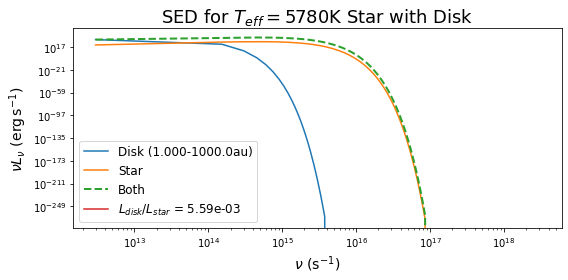

In [111]:
# Calculate disk-to-star luminosity ratio for 3b,i
SED_Disk_clear_1au_freq = SED('freq','xvar_luminos',r_min=1.0)
freq_ydata_3b_i = SED_Disk_clear_1au_freq.StarDiskProfile()

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


StarDiskProfile took 10.92 sec (0.182 min) to run


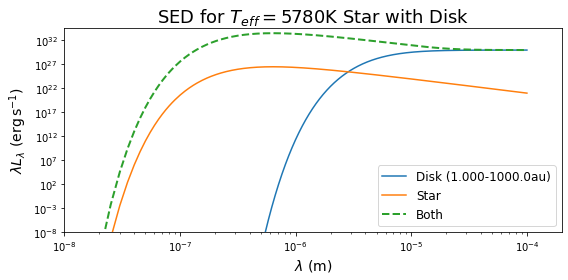

In [112]:
# Plot disk, star, and combined SED for #3b,i (dust cleared out from within 1 au)
SED_Disk_clear_1au_wavelen = SED('wavelen','xvar_luminos',r_min=1.0)
SED_Disk_clear_1au_wavelen.StarDiskProfile()

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Lstar = 1.006 Lsun
Disk-to-Star Luminosity Ratio = 9.86e-04
StarDiskProfile took 50.29 sec (0.838 min) to run


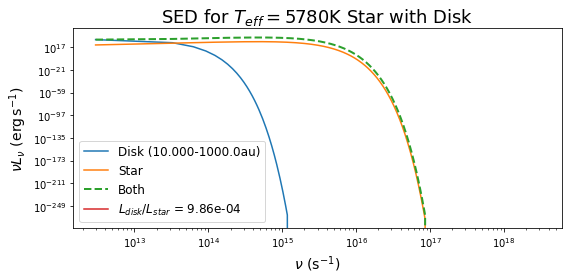

In [114]:
# Calculate disk-to-star luminosity ratio for 3b,ii
SED_Disk_clear_10au_freq = SED('freq','xvar_luminos',r_min=10.0,N=10**5)
freq_ydata_3b_ii = SED_Disk_clear_10au_freq.StarDiskProfile()

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


StarDiskProfile took 53.25 sec (0.888 min) to run


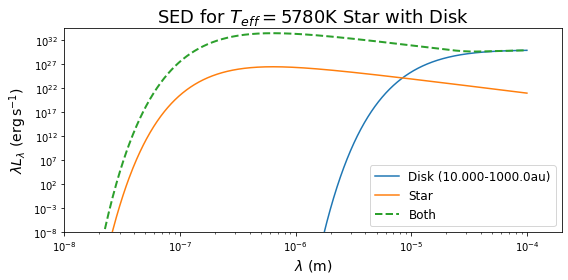

In [122]:
# Plot disk, star, and combined SED for #3b,ii (dust cleared out from within 10 au)
SED_Disk_clear_10au_wavelen = SED('wavelen','xvar_luminos',r_min=10.0,N=10**5)
SED_Disk_clear_10au_wavelen.StarDiskProfile()

### Comparing the SEDs for dust cleared out within 1 and 10 au of the host star to the SED with no dust cleared out past 0.02 au ($r_{sub}$), it's clear that the former peak at longer wavlengths ($\sim 10-100\mu m$) than the latter at shorter wavelengths ($\sim 1 \mu m$).
### It appears that you could infer the presence of a planet (dust cleared out within a certain distance from the host star) by looking at the frequency gap between where the star+disk and disk SEDs begin to be detected (i.e. where they first appear above the x-axis). Additionally, the star+disk SED begins to match the disk SED at short wavelengths and where this overlap begins is also different for the 1au and 10au cases (e.g. the green dashed line matches the blue line over a broader frequency range for the 1au case than the 10au case)

## 3c) Suppose the disk inner edge were now 0.1 au and the outer edge of the disk was truncated at 10au due to the gravitational effects of a distant planet or perhaps a companion star.  How does the resulting SED change compared to the full-disk case? 

Lstar = 1.006 Lsun
Disk-to-Star Luminosity Ratio = 4.04e+00
StarDiskProfile took 51.44 sec (0.857 min) to run


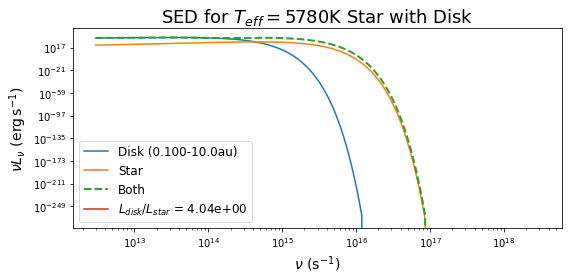

In [120]:
# Initialize SED class for case in #3c (dust lies from .1-10au)
SED_Disk_truncated_freq = SED('freq','xvar_luminos',r_min=0.10,r_max=10.0,dr=.01,N=10**5)
freq_ydata_3c = SED_Disk_truncated_freq.StarDiskProfile()

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


StarDiskProfile took 52.22 sec (0.870 min) to run


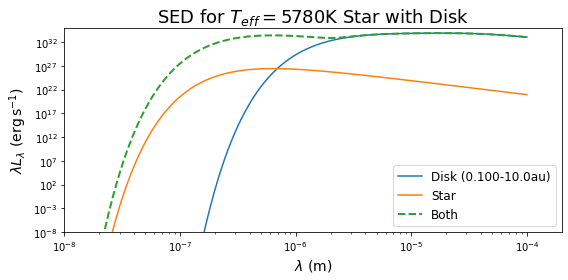

In [121]:
# Plot disk, star, and combined SED for #3b,ii (dust cleared out from within 10 au)
SED_Disk_truncated_wavelen = SED('wavelen','xvar_luminos',r_min=0.10,r_max=10.0,dr=.01,N=10**5)
SED_Disk_truncated_wavelen.StarDiskProfile()

### The truncated disk SED peaks at about $10\mu m$ instead of $1\mu m$ for the full disk SED and also the star+disk SED is dominated by the disk at . Additionally, the truncated SED has a consistently higher luminosity and dominates the star+disk SED across a wider frequency range (begins at $\sim1\mu m$ for the truncated case and at $\sim10\mu m$ for the full disk case).

## 3d) Use actual data from the Beta Pictoris system from the near and far infrared to create a model for an A6V star ($T_{eff}=8000K,R=1.92R_{\odot}$) surrounded by a dusty disk (assume a distance of 19pc)

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Lstar = 7.085 Lsun
Program took 7.81 sec (0.130 min) to run


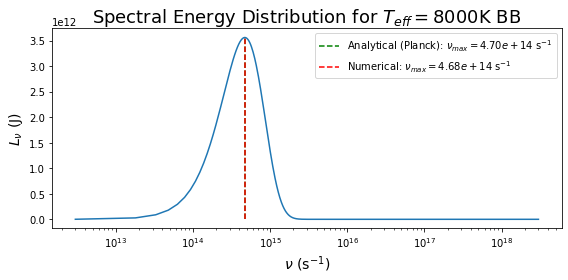

In [184]:
# Get first look at SED for A6V star with disk from sublimation radius to 1000au
SED_A6V_initial_freq = SED('freq','luminosity',Teff=8000,Rstar=1.92,N=2*10**5)
freq_A6V_initial,luminos_A6V_initia = SED_A6V_initial_freq.SEDStar(plot=True)

Total dust mass = 1.001 M_Earth


/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


StarDiskProfile took 105.57 sec (1.760 min) to run


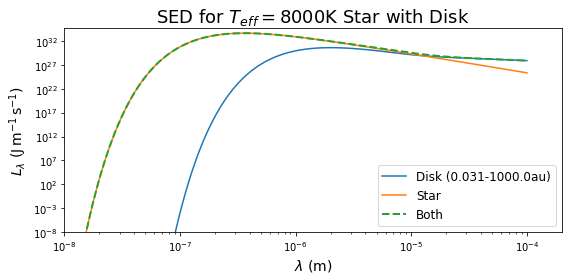

In [233]:
SED_A6V_initial_wave = SED('wavelen','luminosity',Teff=8000,Rstar=1.92,N=2*10**5)
A6V_initial_combined = SED_A6V_initial_wave.StarDiskProfile()

In [157]:
# Function to determine wavelength limits of different bands
def BandLimits(midpoint,FWHM):
    # Inputs:
    #   midpoint: central frequency of band
    #   FWHM: FWHM of band
    # Returns:
    #   limits: 2-element array of lower and upper wavelengths of band (in meters)
    
    # Redefine midpoint and FWHM in meters
    midpoint = midpoint.to(u.m)
    FWHM = FWHM.to(u.m)
    
    # Calculate sigma of wavelength distribution
    sigma = FWHM/2.35
    
    # Calculate limits
    lower = np.round(midpoint-(sigma*3.0),9)
    upper = np.round(midpoint+(sigma*3.0),9)
    
    return([lower.value,upper.value])

In [171]:
# Calculate wavelength limits for each band
band_limits = []
for params in band_params:
    limits = BandLimits(params[0],params[1])
    band_limits.append(limits)

### I originally wrote this function because I thought the HST tool would be more optimized to provide monochromatic fluxes for a range of wavelengths. Since it can really only do one wavelength at a time, I didn't use this function

In [191]:
# Define midpoints and FWHMs (in nm) for different bands from SIMBAD (V,R,I,J,H,K)
# Data from https://en.wikipedia.org/wiki/Photometric_system
V_params = [551.0,88.0]
R_params = [658.0,138.0]
I_params = [806.0,149.0]
J_params = [1220.0,213.0]
H_params = [1630.0,307.0]
K_params = [2190.0,390.0]
band_params = np.asarray([[551.0,88.0],[658.0,138.0],[806.0,149.0],[1220.0,213.0],[1630.0,307.0],[2190.0,390.0]])*u.nm
band_midpoints = (np.asarray([551.0,658.0,806.0,1220.0,1630.0,2190.0])*u.nm).to(u.m).value

In [ ]:
# Calculate monochromatic luminosity at midpoints of different bands (full disk)
my_luminosities_fulldisk = []
for i in range(len(band_midpoints)):
    testSED = SED('freq','luminosity',Teff=8000,Rstar=1.92,lambda_min=band_midpoints[i],lambda_max=band_midpoints[i],N=1)
    test_StarDiskdata = testSED.StarDiskProfile(plot=False)
    my_luminosities_fulldisk.append(test_StarDiskdata[0])

In [180]:
# Projected surface area at distance to Beta Pictoris
denominator = 4*np.pi*(19*u.pc).to(u.m)**2

In [202]:
# Make list of band magnitudes
# Data from http://simbad.u-strasbg.fr/simbad/sim-id?mescat.iso=on&Ident=@2997572&Name=*+bet+Pic&submit=display+selected+measurements#lab_meas
band_magnitudes = [3.86,3.74,3.58,3.57,3.51,3.48]

# Convert to fluxes/luminosities using this HST/STScI tool: https://colortool.stsci.edu/unit-conversion/#output
band_flux = np.asarray([1.01e-24,9.16e-25,8.32e-25,6.23e-25,3.87e-25,2.51e-25])*((u.J/u.s)/(u.Hz*u.m**2))
band_luminosity = (band_flux*denominator).value

In [210]:
# Find ratio of luminosities from my calculations (full disk) and HST calculator
print(my_luminosities_fulldisk/band_luminosity)

[0.79397265 0.8990482  0.93184301 0.88621074 1.00168922 1.01178437]


### Considering a full disk from the sublimation distance to 1000au, my luminosity values agree reasonably well with the converted magnitudes from SIMBAD (i.e. ratios near 1). This model seems to work best towards the H and K bands.

In [ ]:
# Calculate monochromatic luminosity at midpoints of different bands (truncated disk)
my_luminosities_truncated = []
for i in range(len(band_midpoints)):
    testSED = SED('freq','luminosity',Teff=8000,Rstar=1.92,r_min=0.1,r_max=100.0,lambda_min=band_midpoints[i],lambda_max=band_midpoints[i],N=1)
    test_StarDiskdata = testSED.StarDiskProfile(plot=False)
    my_luminosities_truncated.append(test_StarDiskdata[0])

In [226]:
# Find ratio of luminosities from my calculations (full disk) and HST calculator
print(my_luminosities_truncated/band_luminosity)

[0.79397251 0.89904655 0.93182734 0.88600737 1.00498679 1.06211009]


### Considering a truncated disk makes my ratios worse so this doesn't appear to match the published data better

In [ ]:
# Now decrease dust size by a factor of 10 (.01mm instead of .1mm) for full disk
my_luminosities_fulldisk_red_size = []
for i in range(len(band_midpoints)):
    testSED = SED('freq','luminosity',Teff=8000,Rstar=1.92,lambda_min=band_midpoints[i],lambda_max=band_midpoints[i],N=1)
    test_StarDiskdata = testSED.StarDiskProfile(plot=False)
    my_luminosities_fulldisk_red_size.append(test_StarDiskdata[0])

In [228]:
# Find ratio of luminosities from my calculations (full disk) and HST calculator
print(my_luminosities_fulldisk_red_size/band_luminosity)

[0.79397387 0.8990631  0.93198666 0.88987169 1.02097695 1.07074759]


### This slightly improves the smaller wavelength bands but worsens the larger bands

Total dust mass = 1.001 M_Earth


/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


StarDiskProfile took 11.06 sec (0.184 min) to run


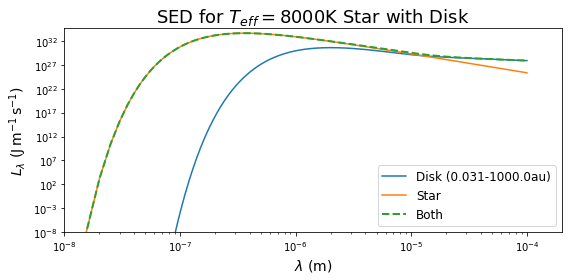

In [231]:
SED_A6V_smalldust = SED('wavelen','luminosity',Teff=8000,Rstar=1.92)
A6V_smalldust_combined = SED_A6V_smalldust.StarDiskProfile(plot=True)

### Regarding the degeneracy between the mass of dust, inner radius of the disk, and outer radius of the disk: if the mass is decreased, but the size of the disk increased, you may see the same effects as if the mass was increased, but the size of the disk was decreased. So to investigate how modifying the mass changes the SED, the disk size must remain the same and vice versa to investigate how modifying the disk size changes the SED. 

### Perhaps due to the nature of the scales of my graphs, I don't notice a significant difference in the SEDs for smaller vs. larger dust size (i.e. smaller vs larger dust mass). The dust mass/size assumption is important though because it dictates how the grain radiates and which wavelengths of light it most effectively absorbs/emits.
### My luminosity values being relatively similar to the published values indicates to me that a model disk with our assumed properties ($1 M_\oplus$ spread over $r_{sub}$ to 1000au, a_{grain}=.1mm) is a decent model for Beta Pictoris' disk.